<a href="https://colab.research.google.com/github/efolwacz/DeepLearning25/blob/main/week_1/CIFAR10-ShallowLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: CIFAR10 Challenge

**CIFAR10** (http://www.cs.toronto.edu/~kriz/cifar.html) is one of the most famous ML data sets.

## Data
* 32x32 color images
* in 10 classes
* 50k training images
* 10k test images



<img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=700>

In [34]:
#get data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [35]:
#traindata: 50k 32X32 rgb images
X_train.shape

(50000, 32, 32, 3)

In [36]:
#labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Task: build the best classifier (with feature extration) using the methods you know from ML1+2
* work in small teams (2-4)
* use NumPy pre-processing, feature extraction and hyer-parameter tuning in Scikit-Learn
* no Neural Networks!
* best test F1-Score winns!

In [65]:
import numpy as np
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

In [89]:
bins = 8

# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature


def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

def edges(image):
  # Convert to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Detect edges using Canny method
  e = cv2.Canny(gray, 150, 300)
  return e.flatten()


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255]], dtype=uint8)
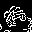

In [91]:
edge = edges(X_train[0])
edge


In [92]:


# Feature-Liste für alle Bilder
features = []

def transform(data):
  features = []

  for img in data:  # img hat die Form (32, 32, 3)
    # features.append(fd_hu_moments(img))


      ####################################
    # Global Feature extraction
    ####################################
    fv_hu_moments = fd_hu_moments(img)
    fv_histogram  = fd_histogram(img)
    e = edges(img)


    # np.array([skimage.color.rgb2gray(img)])

    ###################################
    # Concatenate global features
    ###################################
    global_feature = np.hstack([fv_histogram, fv_hu_moments, e])
    features.append(global_feature)


  return features
  # X_features = np.array(features)  # Shape: (50000, n_features)


In [41]:
# features

In [93]:
clf = RandomForestClassifier()

clf.fit(transform(X_train), y_train)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 2 has 2 dimension(s)

In [76]:
y_pred = clf.predict(transform(X_test))

acc = accuracy_score(y_pred, y_test)
acc

0.4257